#### Pyspark Basic Introduction

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=69dc35fc50a6c86613c043fc8150e631dd4267e990b3f8417c60058e7de6301d
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
import pyspark

In [3]:
!pip install pandas

In [4]:
import pandas as pd
type(pd.read_csv('/content/yellow_tripdata_2021-01.csv'))

<ipython-input-4-856a364992a6>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  type(pd.read_csv('/content/yellow_tripdata_2021-01.csv'))


pandas.core.frame.DataFrame

In [5]:
from pyspark.sql import SparkSession

In [6]:
spark=SparkSession.builder.appName('Practice').getOrCreate()

In [7]:
spark

In [8]:
df_pyspark=spark.read.csv('/content/yellow_tripdata_2021-01.csv')

In [9]:
df_pyspark=spark.read.option('header','true').csv('/content/yellow_tripdata_2021-01.csv')

In [10]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [11]:
df_pyspark.printSchema()

root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)



In [12]:
df_pyspark.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       1| 2021-01-01 00:30:10|  2021-01-01 00:36:12|              1|         2.10|         1|                 N|         142|          43|           2|          8|    3|    0.5|         0|           0|                  0.3

In [13]:
df_pyspark.count()

1369765

First thing we have to do is to change data types, because as of right now all of them are strings

In [14]:
from pyspark.sql.functions import *


In [15]:
# datetime columns
dates_col = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]
for column in dates_col:
  df_pyspark = df_pyspark.withColumn(column,to_timestamp(column))


In [16]:
# int columns
int_col = ["VendorID", "passenger_count", "RatecodeID", "PULocationID", "DOLocationID", "payment_type"]
for column in int_col:
  df_pyspark = df_pyspark.withColumn(column, col(column).cast('int'))

In [17]:
# float columns
float_col = ["trip_distance", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge"]
for column in float_col:
  df_pyspark = df_pyspark.withColumn(column, col(column).cast('float'))

In [18]:
df_pyspark.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: float (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: float (nullable = true)
 |-- extra: float (nullable = true)
 |-- mta_tax: float (nullable = true)
 |-- tip_amount: float (nullable = true)
 |-- tolls_amount: float (nullable = true)
 |-- improvement_surcharge: float (nullable = true)
 |-- total_amount: float (nullable = true)
 |-- congestion_surcharge: float (nullable = true)



Lets look at some summary statistics

In [19]:
df_pyspark.summary().show()


+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------------+------------------+--------------------+
|summary|          VendorID|   passenger_count|     trip_distance|        RatecodeID|store_and_fwd_flag|     PULocationID|      DOLocationID|      payment_type|       fare_amount|             extra|            mta_tax|        tip_amount|       tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------------+------------------+--------------------+
|  count|           1271413|           1

Some of the things dont make sense as we can see, for example tips or fare_amount below 0

In [20]:
df_pyspark.filter(df_pyspark.fare_amount < 0).count()
df_pyspark.filter(df_pyspark.extra < 0).count()
df_pyspark.filter(df_pyspark.tip_amount < 0).count()
df_pyspark.filter(df_pyspark.tolls_amount < 0).count()
df_pyspark.filter(df_pyspark.total_amount < 0).count()

6662

In [21]:
df_pyspark = df_pyspark.filter(df_pyspark.fare_amount > 0).drop()

In [22]:
df_pyspark.count()

1362354

In [23]:
df_pyspark.summary().show()


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+------------------+-------------------+---------------------+------------------+--------------------+
|summary|          VendorID|   passenger_count|     trip_distance|        RatecodeID|store_and_fwd_flag|      PULocationID|      DOLocationID|       payment_type|       fare_amount|             extra|             mta_tax|        tip_amount|       tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------------------+------------------+-------------------+---------------------+------------------+--------------------+
|  count|           1264148|   

In [24]:
for column in df_pyspark.columns:
  nulls = df_pyspark.where(col(column).isNull()).count()
  print(f"The column {column} has {nulls} null values.")

The column VendorID has 98206 null values.
The column tpep_pickup_datetime has 0 null values.
The column tpep_dropoff_datetime has 0 null values.
The column passenger_count has 98206 null values.
The column trip_distance has 0 null values.
The column RatecodeID has 98206 null values.
The column store_and_fwd_flag has 98206 null values.
The column PULocationID has 0 null values.
The column DOLocationID has 0 null values.
The column payment_type has 98206 null values.
The column fare_amount has 0 null values.
The column extra has 0 null values.
The column mta_tax has 0 null values.
The column tip_amount has 0 null values.
The column tolls_amount has 0 null values.
The column improvement_surcharge has 0 null values.
The column total_amount has 0 null values.
The column congestion_surcharge has 0 null values.


In [25]:
#quicker check for nulls
df_pyspark.select([count(when(col(c).isNull(), c)).alias(c) for c in df_pyspark.columns]).show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|   98206|                   0|                    0|          98206|            0|     98206|             98206|           0|           0|       98206|          0|    0|      0|         0|           0|                    0

In [26]:
df_pyspark = df_pyspark.dropna()

In [27]:
df_pyspark.count()

1264148

In [28]:
df_pyspark.select([count(when(col(c).isNull(), c)).alias(c) for c in df_pyspark.columns]).show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       0|                   0|                    0|              0|            0|         0|                 0|           0|           0|           0|          0|    0|      0|         0|           0|                    0

After getting rid of null values we can convert the dataframe to pandas and do some visualization and EDA.

In [29]:
Pandas_DF = df_pyspark.toPandas()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [30]:
Pandas_DF

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,1,N,142,43,2,8.0,3.0,0.5,0.00,0.00,0.3,11.800000,2.5
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,1,N,238,151,2,3.0,0.5,0.5,0.00,0.00,0.3,4.300000,0.0
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,1,N,132,165,1,42.0,0.5,0.5,8.65,0.00,0.3,51.950001,0.0
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0,10.60,1,N,138,132,1,29.0,0.5,0.5,6.05,0.00,0.3,36.349998,0.0
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,1,N,68,33,1,16.5,0.5,0.5,4.06,0.00,0.3,24.360001,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264143,2,2021-01-31 23:58:47,2021-02-01 00:04:40,3,0.81,1,N,41,74,2,5.0,0.5,0.5,0.00,0.00,0.3,6.300000,0.0
1264144,2,2021-01-31 23:07:54,2021-01-31 23:19:42,1,3.81,1,N,113,141,2,12.5,0.5,0.5,0.00,0.00,0.3,16.299999,2.5
1264145,2,2021-01-31 23:30:45,2021-01-31 23:35:13,1,1.32,1,N,233,237,2,6.0,0.5,0.5,0.00,0.00,0.3,9.800000,2.5
1264146,2,2021-01-31 23:09:52,2021-01-31 23:51:56,2,10.56,1,N,56,68,1,37.5,0.5,0.5,0.00,6.12,0.3,44.919998,0.0


In [31]:
import matplotlib.pyplot as plt


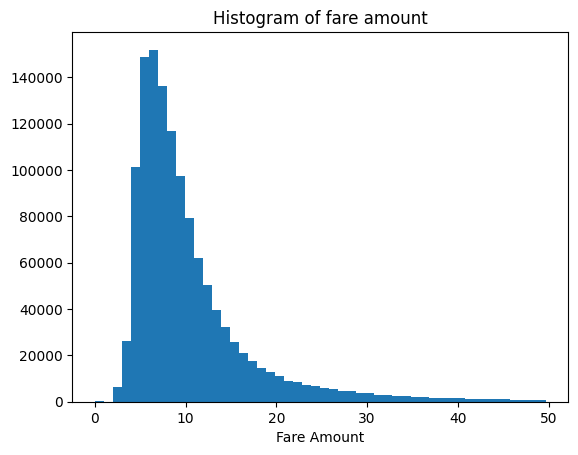

In [32]:
fare_condition = Pandas_DF['fare_amount'] < 50
plt.hist(Pandas_DF[fare_condition]['fare_amount'], bins=50)
plt.xlabel('Fare Amount')
plt.title("Histogram of fare amount")
plt.show()

As we can see the most frequent fare_amount is around the 8 dollar mark, with a steep decline as we go towards 30 dollars.

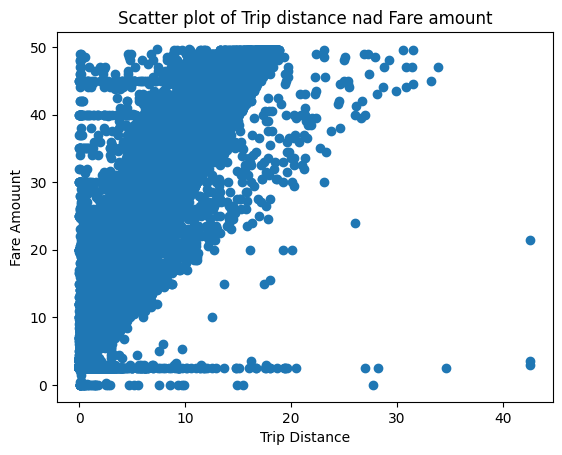

In [33]:
trip_fare_condition = ((Pandas_DF['trip_distance'] < 50 )& (Pandas_DF['trip_distance'] > 0)) & ((Pandas_DF['fare_amount'] < 50)& (Pandas_DF['fare_amount'] > 0))
plt.scatter(Pandas_DF[trip_fare_condition]['trip_distance'], Pandas_DF[trip_fare_condition]["fare_amount"])
plt.xlabel('Trip Distance')
plt.ylabel("Fare Amouunt")
plt.title("Scatter plot of Trip distance nad Fare amount")
plt.show()

From the scatter plot we can see that as the trip distance gets longer so does the fare_amount, but we have some outliers where the fare_amount stays the same despite the distance getting longer.

In [34]:
import seaborn as sns

In [35]:
columns_relevant = ['passenger_count', 'tip_amount','fare_amount', 'total_amount', 'trip_distance']
corr_matrix = Pandas_DF[columns_relevant].corr()
corr_matrix

,passenger_count,tip_amount,fare_amount,total_amount,trip_distance
passenger_count,1.000000,0.005177,0.004738,0.005893,0.000143
tip_amount,0.005177,1.000000,0.462060,0.611958,0.013091
fare_amount,0.004738,0.462060,1.000000,0.976326,0.026815
total_amount,0.005893,0.611958,0.976326,1.000000,0.027003
trip_distance,0.000143,0.013091,0.026815,0.027003,1.000000


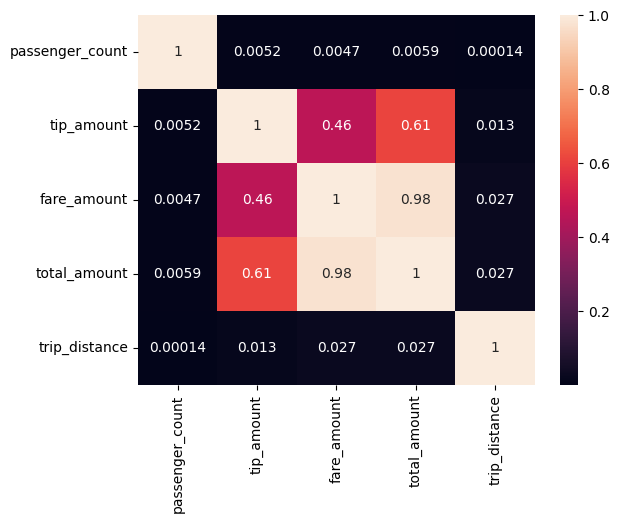

In [36]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

From what we can see from the correlation diagram, there are not that many correlations above the 0.2 value which is considered to be the lowest amount to even consider it. Personally I thought that passenger_count would correlate with tip_amount but it seems that is not the case. On the other hand we can see that tip_amount moderately correlates with fare_amount and total_amount, also fare_amount has a very high positive correlation with total_amount.

In [37]:
import psycopg2

In [47]:
from sqlalchemy import create_engine

database = 'nyc_taxi'
username = 'postgres'


# create the engine
engine = create_engine(f'postgresql://{username}:{pwd}@{hostname}:{port_id}/{database}')

# write the DataFrame to a table in your database
Pandas_DF.to_sql('transformed_table', engine, if_exists='replace')


148

In [49]:

database = 'nyc_taxi'
username = 'postgres'




conn = psycopg2.connect(
    host = hostname,
    dbname = database,
    user = username,
    password = pwd,
    port = port_id
)



cursor = conn.cursor()
cursor.execute("SELECT * FROM transformed_table LIMIT 5;") 


results = cursor.fetchall()
for row in results:
    print(row)


cursor.close()
conn.close()

(0, 1, datetime.datetime(2021, 1, 1, 0, 30, 10), datetime.datetime(2021, 1, 1, 0, 36, 12), 1, 2.1, 1, 'N', 142, 43, 2, 8.0, 3.0, 0.5, 0.0, 0.0, 0.3, 11.8, 2.5)
(1, 1, datetime.datetime(2021, 1, 1, 0, 51, 20), datetime.datetime(2021, 1, 1, 0, 52, 19), 1, 0.2, 1, 'N', 238, 151, 2, 3.0, 0.5, 0.5, 0.0, 0.0, 0.3, 4.3, 0.0)
(2, 1, datetime.datetime(2021, 1, 1, 0, 43, 30), datetime.datetime(2021, 1, 1, 1, 11, 6), 1, 14.7, 1, 'N', 132, 165, 1, 42.0, 0.5, 0.5, 8.65, 0.0, 0.3, 51.95, 0.0)
(3, 1, datetime.datetime(2021, 1, 1, 0, 15, 48), datetime.datetime(2021, 1, 1, 0, 31, 1), 0, 10.6, 1, 'N', 138, 132, 1, 29.0, 0.5, 0.5, 6.05, 0.0, 0.3, 36.35, 0.0)
(4, 2, datetime.datetime(2021, 1, 1, 0, 31, 49), datetime.datetime(2021, 1, 1, 0, 48, 21), 1, 4.94, 1, 'N', 68, 33, 1, 16.5, 0.5, 0.5, 4.06, 0.0, 0.3, 24.36, 2.5)
